# Exploratory Data Analysis (EDA) - Bangalore House Prices

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../data/processed/cleaned_data.csv")
df.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0




## 1. Data Overview
Let's understand the basic structure of our dataset.

In [24]:
# Basic info about the dataset
print("Dataset Shape:", df.shape)
print("\n" + "="*50)
print("\nColumn Names:")
print(df.columns.tolist()[:10], "... and", len(df.columns)-10, "more")
print("\n" + "="*50)
print("\nData Types Summary:")
print(df.dtypes.value_counts())

Dataset Shape: (6216, 108)


Column Names:
['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft', 'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area', 'area_typePlot  Area', 'availability_Ready To Move'] ... and 98 more


Data Types Summary:
int64      103
float64      5
Name: count, dtype: int64


## 2. Key Features Identification
We have 108 columns. Let's identify the main features vs one-hot encoded columns.

In [13]:
# Separate main features from one-hot encoded location columns
main_features = ['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft']

area_type_cols = [col for col in df.columns if col.startswith('area_type')]

availability_cols = [col for col in df.columns if col.startswith("availability") ]

location_cols = [col for col in df.columns if col.startswith('location_')]


In [14]:
print(f"Main Features: {len(main_features)} columns")
print(f"Area Type Columns: {len(area_type_cols)} columns")
print(f"Availability Columns: {len(availability_cols)} columns") 
print(f"Location Columns: {len(location_cols)} columns")
print(f"\nTotal: {len(main_features) + len(area_type_cols) + len(availability_cols) + len(location_cols)} columns")


Main Features: 6 columns
Area Type Columns: 3 columns
Availability Columns: 1 columns
Location Columns: 98 columns

Total: 108 columns


## 3. Statistical Summary
Focusing on the 6 main numerical features.

In [22]:
df[main_features].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
bath,6216.0,2.35,0.84,1.0,2.0,2.00,3.00,9.00
balcony,6216.0,1.57,0.77,0.0,1.0,2.00,2.00,3.00
price,6216.0,81.75,63.80,10.0,49.0,67.00,95.00,2100.00
total_sqft_int,6216.0,1434.09,859.62,350.0,1085.0,1250.00,1595.25,30400.00
bhk,6216.0,2.43,0.82,1.0,2.0,2.00,3.00,9.00
price_per_sqft,6216.0,5454.35,1419.47,1250.0,4400.0,5313.16,6381.05,9947.64


## 4. Target Variable Analysis - Price
Price is our target variable. Let's understand its distribution.

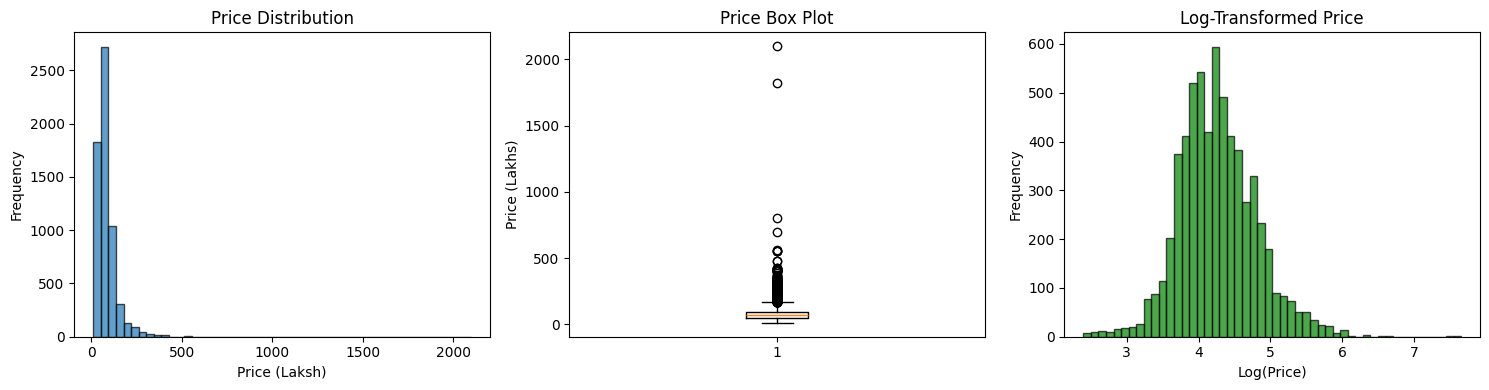

In [33]:
fig , axes = plt.subplots(1,3,figsize=(15,4))


#Histogram
axes[0].hist(df['price'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel("Price (Laksh)")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Price Distribution")

# Box Plot
axes[1].boxplot(df['price'])
axes[1].set_ylabel('Price (Lakhs)')
axes[1].set_title("Price Box Plot")

axes[2].hist(np.log1p(df['price']), bins=50, edgecolor='black', alpha=0.7, color='green')
axes[2].set_xlabel('Log(Price)')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Log-Transformed Price')

plt.tight_layout()
plt.show()

In [34]:
# Print key statistics
print(f"Average Price: ₹{df['price'].mean():.2f} Lakhs")
print(f"Median Price: ₹{df['price'].median():.2f} Lakhs")
print(f"Min Price: ₹{df['price'].min():.2f} Lakhs")
print(f"Max Price: ₹{df['price'].max():.2f} Lakhs")
print(f"Skewness: {df['price'].skew():.2f}")

Average Price: ₹81.75 Lakhs
Median Price: ₹67.00 Lakhs
Min Price: ₹10.00 Lakhs
Max Price: ₹2100.00 Lakhs
Skewness: 10.28


## 5. Distribution of Key Features

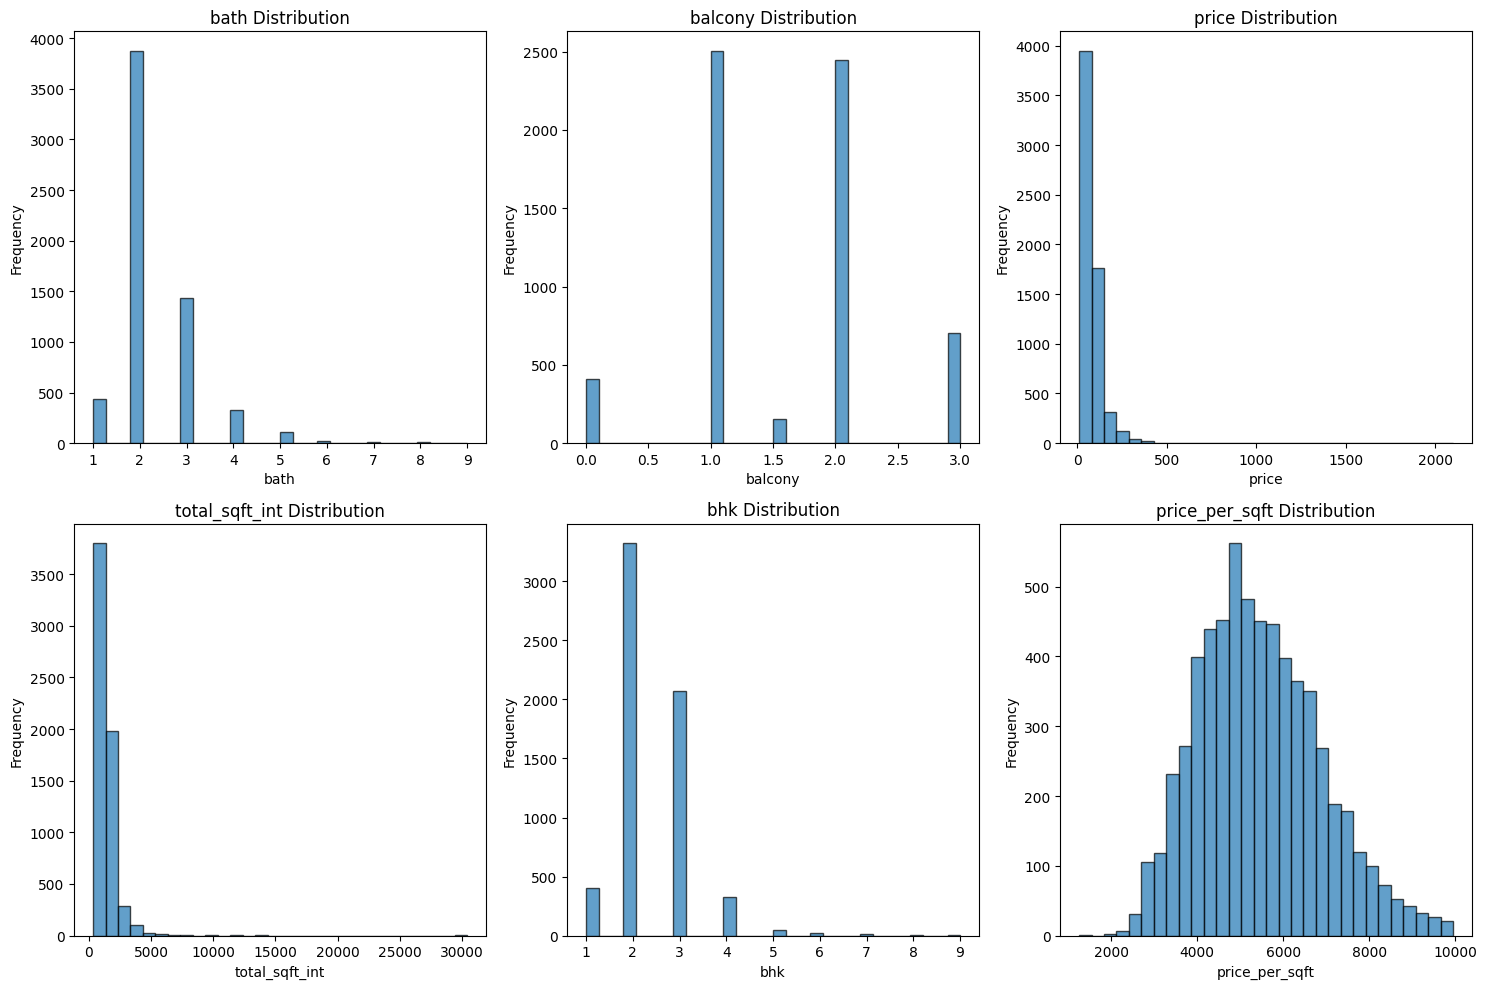

In [37]:
ig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx ,col in enumerate(main_features):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f"{col} Distribution")
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

## 6. BHK (Bedrooms) Analysis

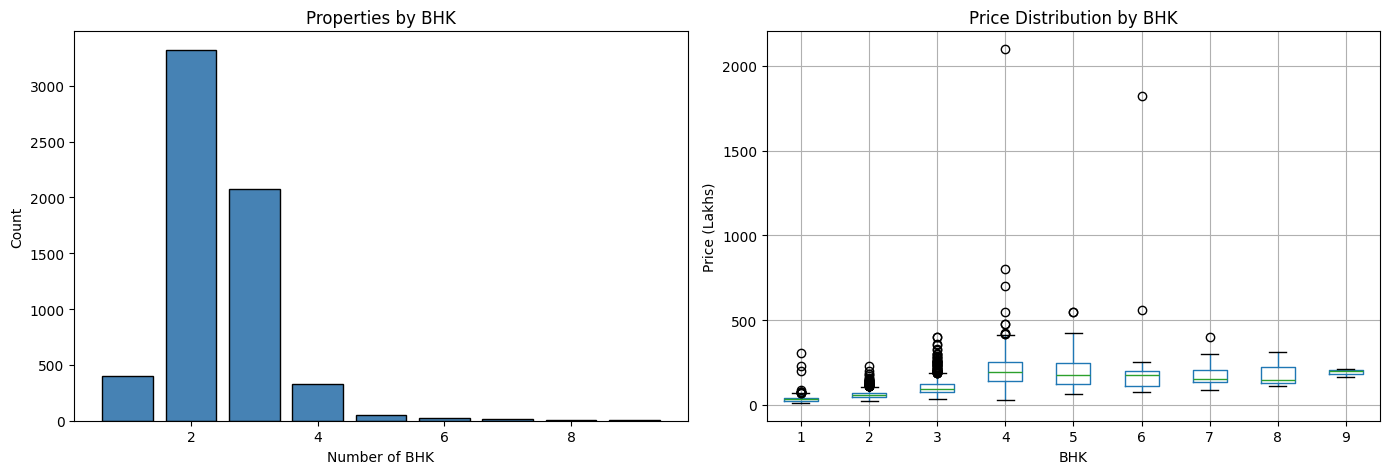

BHK Distribution:
bhk
1     401
2    3322
3    2072
4     325
5      48
6      25
7      11
8       9
9       3
Name: count, dtype: int64


In [38]:
# BHK Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
bhk_counts = df['bhk'].value_counts().sort_index()
axes[0].bar(bhk_counts.index, bhk_counts.values, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Number of BHK')
axes[0].set_ylabel('Count')
axes[0].set_title('Properties by BHK')

# Price by BHK
df.boxplot(column='price', by='bhk', ax=axes[1])
axes[1].set_xlabel('BHK')
axes[1].set_ylabel('Price (Lakhs)')
axes[1].set_title('Price Distribution by BHK')
plt.suptitle('')  # Remove automatic title

plt.tight_layout()
plt.show()

# Print statistics
print("BHK Distribution:")
print(df['bhk'].value_counts().sort_index())